In [3]:
"""
Battery Cycle Life Analysis
Simple notebook demonstrating capacity fade, coulombic efficiency and dQ/dV visualisation.
Author: <LunaZhang>
"""


'\nBattery Cycle Life Analysis\nSimple notebook demonstrating capacity fade, coulombic efficiency and dQ/dV visualisation.\nAuthor: <LunaZhang>\n'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [5]:
# -------------------------------------------------
# 1. Generate demo cycle‑life data (replace with real data if available)
# -------------------------------------------------
np.random.seed(42)
N_CYCLES = 300
cycles = np.arange(1, N_CYCLES + 1)
initial_capacity = 2.50        # Ah
fade_rate = 0.0008             # linear fade per cycle (demo only)
capacity = initial_capacity * (1 - fade_rate * cycles) + np.random.normal(0, 0.01, N_CYCLES)
coulombic_eff = 0.998 + np.random.normal(0, 0.0005, N_CYCLES)

# mock dQ/dV curve (Gaussian peak plus noise)
voltages = np.linspace(2.5, 4.2, 200)
dQdV_curve = np.exp(-((voltages - 3.6) ** 2) / (2 * 0.1 ** 2)) + 0.05 * np.random.rand(200)

# 保存示例数据，方便后续复现或替换
pd.DataFrame({
    "Cycle": cycles,
    "Capacity_Ah": capacity,
    "Coulombic_Efficiency": coulombic_eff
}).to_csv("cycle_data_demo.csv", index=False)


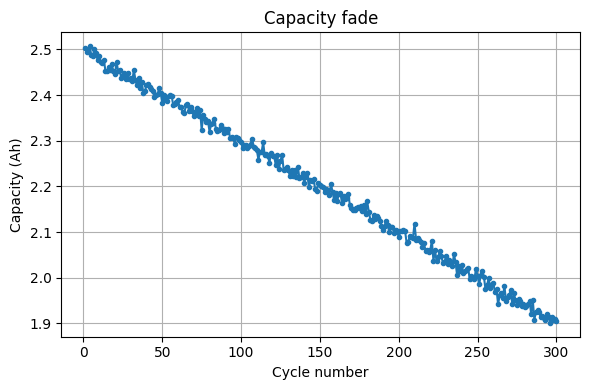

In [6]:
# -------------------------------------------------
# 2. Capacity vs. cycle number
# -------------------------------------------------
plt.figure(figsize=(6, 4))
plt.plot(cycles, capacity, marker="o", ms=3)
plt.xlabel("Cycle number")
plt.ylabel("Capacity (Ah)")
plt.title("Capacity fade")
plt.grid(True)
plt.tight_layout()
plt.savefig("capacity_vs_cycle.png", dpi=300)
plt.show()


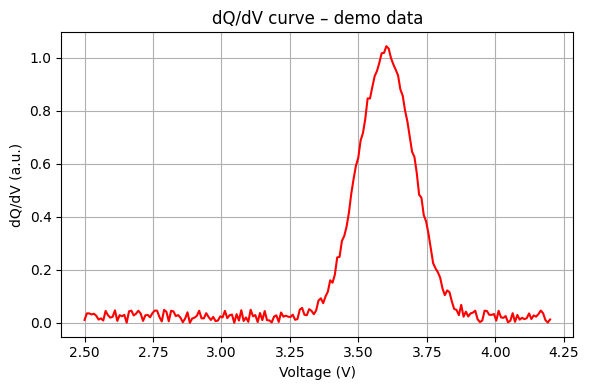

In [7]:
# -------------------------------------------------
# 4. dQ/dV curve (demo)
# -------------------------------------------------
plt.figure(figsize=(6, 4))
plt.plot(voltages, dQdV_curve, color="red")
plt.xlabel("Voltage (V)")
plt.ylabel("dQ/dV (a.u.)")
plt.title("dQ/dV curve – demo data")
plt.grid(True)
plt.tight_layout()
plt.savefig("dQdV_curve.png", dpi=300)
plt.show()


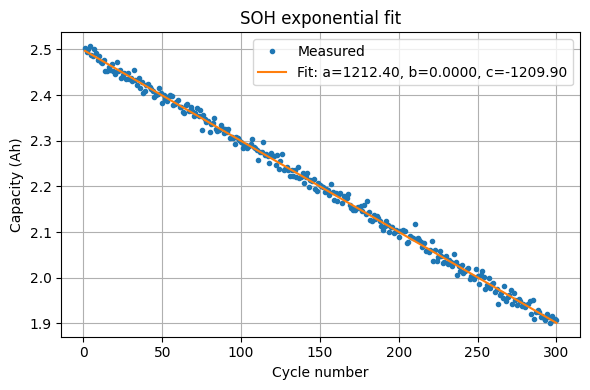

In [9]:
# -------------------------------------------------
# 5. Exponential SOH decay fit
# -------------------------------------------------

def exp_decay(x, a, b, c):
    """Exponential capacity fade model: a*exp(-b*x) + c"""
    return a * np.exp(-b * x) + c

params, _ = curve_fit(
    exp_decay, cycles, capacity,
    p0=[initial_capacity, fade_rate, 0.0],
    maxfev=5000
)

capacity_fit = exp_decay(cycles, *params)

plt.figure(figsize=(6, 4))
plt.plot(cycles, capacity, "o", ms=3, label="Measured")
plt.plot(cycles, capacity_fit, "-", label=f"Fit: a={params[0]:.2f}, b={params[1]:.4f}, c={params[2]:.2f}")
plt.xlabel("Cycle number")
plt.ylabel("Capacity (Ah)")
plt.title("SOH exponential fit")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("soh_exp_decay_fit.png", dpi=300)
plt.show()
